In [8]:
import pandas as pd
data = pd.read_csv('/Users/namannagaria/Downloads/bank+marketing/bank/bank-full.csv', delimiter=';')
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
# Exploratory Data Analysis (EDA)
# Explore the dataset's structure and summary statistics

In [55]:
data. columns.values.tolist()

['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'y',
 'age_group']

In [59]:
print(data['age'].min())
print(data['age'].max())

18
95


In [56]:
data['education'].unique()

array(['tertiary', 'secondary', 'unknown', 'primary'], dtype=object)

In [60]:
data['job'].unique()

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'unknown', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

In [61]:
data['marital'].unique()

array(['married', 'single', 'divorced'], dtype=object)

In [62]:
data['contact'].unique()

array(['unknown', 'cellular', 'telephone'], dtype=object)

In [63]:
print(data['balance'].min())
print(data['balance'].max())

-8019
102127


In [18]:
data[data['job'] == 'management']

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
21,56,management,married,tertiary,no,779,yes,no,unknown,5,may,164,1,-1,0,unknown,no
26,39,management,single,tertiary,no,255,yes,no,unknown,5,may,296,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45192,29,management,single,tertiary,no,765,no,no,cellular,16,nov,238,1,-1,0,unknown,yes
45194,59,management,married,tertiary,no,138,yes,yes,cellular,16,nov,162,2,187,5,failure,no
45197,36,management,single,secondary,no,1511,yes,no,cellular,16,nov,270,1,-1,0,unknown,yes
45198,37,management,married,tertiary,no,1428,no,no,cellular,16,nov,333,2,-1,0,unknown,no


In [22]:
average_salary = data.groupby('job')['balance'].mean().reset_index()

In [65]:
# Visualize key features using plots

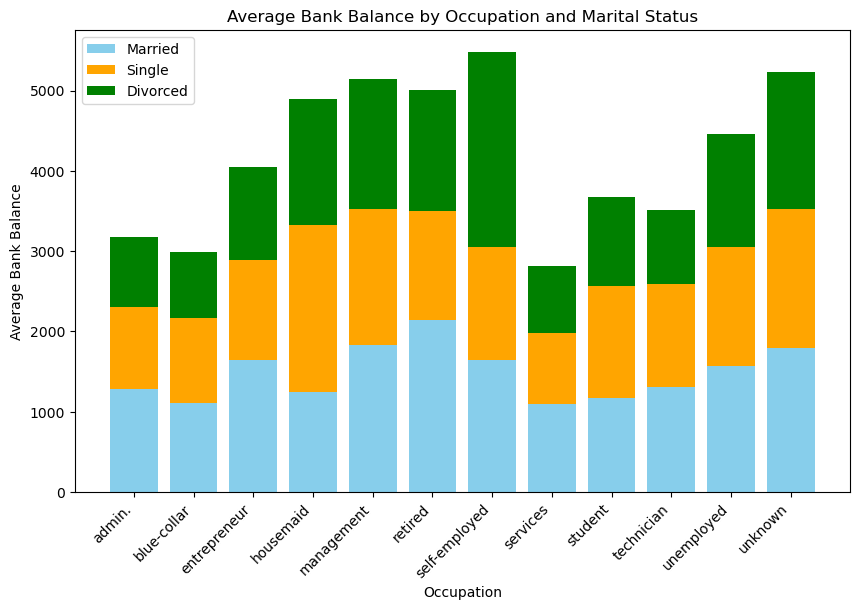

In [74]:
grouped_data = data.groupby(['job', 'marital'])['balance'].mean().unstack().reset_index()

plt.figure(figsize=(10, 6))
bars = plt.bar(grouped_data['job'], grouped_data['married'], label='Married', color='skyblue')
bars = plt.bar(grouped_data['job'], grouped_data['single'], bottom=grouped_data['married'], label='Single', color='orange')
bars = plt.bar(grouped_data['job'], grouped_data['divorced'], bottom=grouped_data['married']+grouped_data['single'], label='Divorced', color='green')

plt.xlabel('Occupation')
plt.ylabel('Average Bank Balance')
plt.title('Average Bank Balance by Occupation and Marital Status')
plt.xticks(rotation=45, ha='right')

plt.legend()

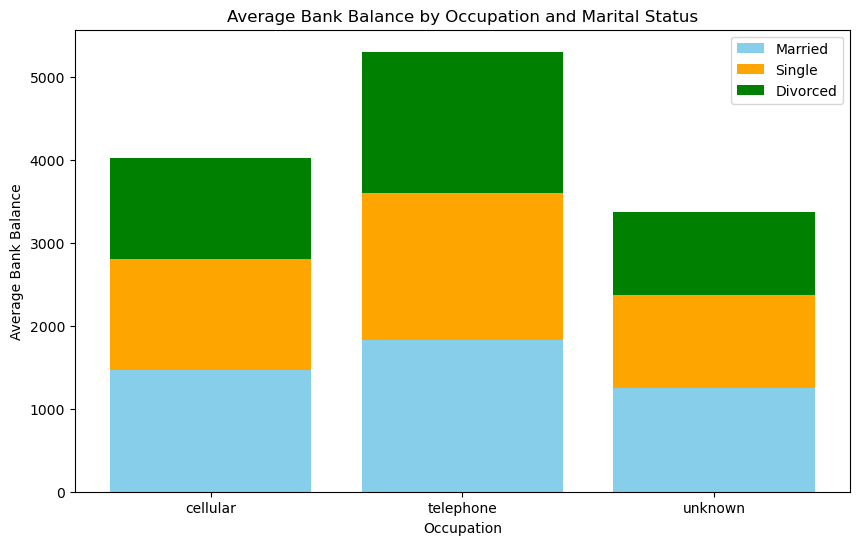

In [73]:
grouped_data = data.groupby(['contact', 'marital'])['balance'].mean().unstack().reset_index()

plt.figure(figsize=(10, 6))
bars = plt.bar(grouped_data['contact'], grouped_data['married'], label='Married', color='skyblue')
bars = plt.bar(grouped_data['contact'], grouped_data['single'], bottom=grouped_data['married'], label='Single', color='orange')
bars = plt.bar(grouped_data['contact'], grouped_data['divorced'], bottom=grouped_data['married']+grouped_data['single'], label='Divorced', color='green')

plt.xlabel('Occupation')
plt.ylabel('Average Bank Balance')
plt.title('Average Bank Balance by Occupation and Marital Status')
plt.legend()

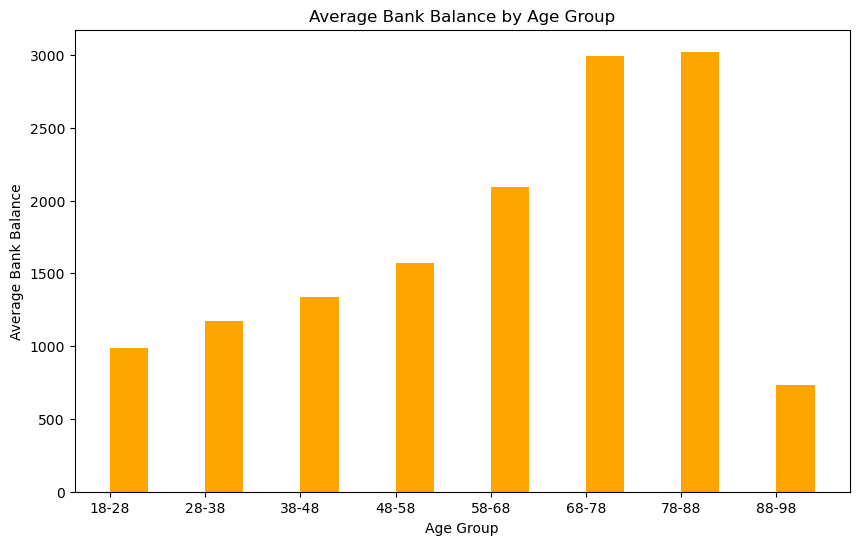

In [54]:
age_bins = [18, 28, 38, 48, 58, 68, 78, 88, 98]
age_labels = ['18-28', '28-38', '38-48', '48-58', '58-68', '68-78', '78-88', '88-98']

data['age_group'] = pd.cut(data['age'], bins=age_bins, labels=age_labels, right=False)


grouped_data = data.groupby('age_group')['balance'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(grouped_data['age_group'], grouped_data['balance'], color='orange', width=0.4, align='edge')

plt.xlabel('Age Group')
plt.ylabel('Average Bank Balance')
plt.title('Average Bank Balance by Age Group')

plt.show()

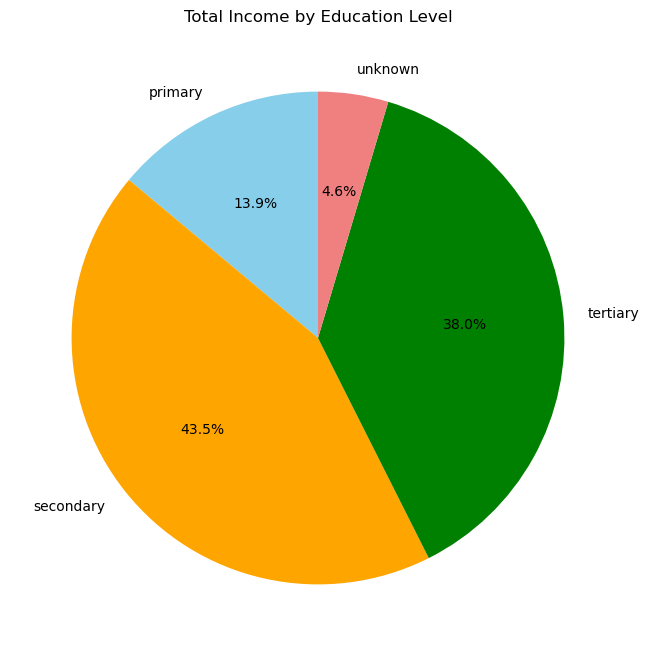

In [58]:
grouped_data = data.groupby('education')['balance'].sum().reset_index()

plt.figure(figsize=(8, 8))
plt.pie(grouped_data['balance'], labels=grouped_data['education'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'orange', 'green', 'lightcoral'])
plt.title('Total Income by Education Level')

plt.show()

In [66]:
# Hypothesis Formulation
# Formulate at least two hypotheses related to the dataset

### Hypothesis 1: Mean balance of all marital status is equal

In [78]:
# Hypothesis Testing
# Test the formulated hypotheses using statistical tests or visualizations

In [83]:
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
single = data['balance'][data['marital'] == 'single']
married = data['balance'][data['marital'] == 'married']
divorced = data['balance'][data['marital'] == 'divorced']

f_statistic, p_value = f_oneway(single, married, divorced)

alpha = 0.05

print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in mean balance between marital statuses.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in mean balance between marital statuses.")

F-statistic: 17.954318144453257
P-value: 1.6055869132631893e-08
Reject the null hypothesis. There is a significant difference in mean balance between marital statuses.


### Hypothesis 2: Balance and occupation are independent of each other

In [84]:
contingency_table = pd.crosstab(data['job'], data['balance'])

chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

alpha = 0.05

print(f"Chi-square statistic: {chi2_stat}")
print(f"P-value: {p_value}")

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant association between balance and occupation.")
else:
    print("Fail to reject the null hypothesis. There is no significant association between balance and occupation.")

Chi-square statistic: 102616.37910752368
P-value: 0.0
Reject the null hypothesis. There is a significant association between balance and occupation.


In [85]:
# Documentation and Reporting
# Document the entire analysis process, including code and explanations
# Summarize key findings in a clear and concise report

### Dataset:
The dataset I chose for this was the bank information data set which had various client information stored.
### Process: 
The process for my analysis started with analysing various variables in the dataset like finding th emin and max values, finding all the unique values for different columns etc. After that I decided to make a few graphs regarding the dataset based around the balance of the clients, like balance of the clients with regards to the marital staus, the cellular device they use, the type of job they hav etc. I also plotted the total income of different education types as a pie chart. 
### Findings:
My findings from these analysis were that there seemed a clear relation between the age groups, marital staus and job with balance. Secondary and tertiary education levels had almost the same total income, the other two were very low though.
### Hypothesis testing: 
The two hypothesis I chose to test were Hypothesis 1: Mean balance of all marital status is equal and Hypothesis 2: Balance and occupation are independent of each other. After performing the hypothesis I found that we can reject both the null hypothesis. 
One reason I belive that we reject most of the null hypothesis in such cases is the large datasets.